In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/Users/mahaksharma/Desktop/Finalised Assignment_01.01.2020'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/Users/mahaksharma/Desktop/Finalised Assignment_01.01.2020/~$signment_Data Scientist_FINAL.docx
/Users/mahaksharma/Desktop/Finalised Assignment_01.01.2020/Assignment_Data Scientist_FINAL.docx
/Users/mahaksharma/Desktop/Finalised Assignment_01.01.2020/Copy of Pancreas_log_tpm_RNAseq_mat.csv
/Users/mahaksharma/Desktop/Finalised Assignment_01.01.2020/pca-plot.svg
/Users/mahaksharma/Desktop/Finalised Assignment_01.01.2020/REMOVAL OF NEURO ENDOCRINE.gct
/Users/mahaksharma/Desktop/Finalised Assignment_01.01.2020/Neuroendocrine and Adinocarcinoma type and dataset.gct
/Users/mahaksharma/Desktop/Finalised Assignment_01.01.2020/Copy of PAAD.gct
/Users/mahaksharma/Desktop/Finalised Assignment_01.01.2020/Copy of type1_IFN.txt


In [3]:
!pip install cmapPy

In [4]:
from cmapPy.pandasGEXpress.parse import parse

Analysing cancer patients dataset based on gene samples provided

In [6]:
data = parse('/Users/mahaksharma/Desktop/Finalised Assignment_01.01.2020/Copy of PAAD.gct')
print(type(data))

<class 'cmapPy.pandasGEXpress.GCToo.GCToo'>


In [8]:
#Parsing gct dataset to pandas dataframe
col_meta_data = data.col_metadata_df
row_meta_data = data.row_metadata_df
my_data = data.data_df
# Columns meta data
col_meta_data.head()

chd,participant_id,sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,additional_studies,adenocarcinoma_invasion,...,tobacco_smoking_history,total_dose,total_dose_units,tumor_tissue_site,tumor_type,withdrawn,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
cid,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,aab1,Primary solid Tumor,1.0,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,66.0,NaN,NaN,yes,...,3.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,1962.0
aab4-Primary solid Tumor,aab4,Primary solid Tumor,2.0,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,NaN,729.0,NaN,yes,...,5.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab6-Primary solid Tumor,aab6,Primary solid Tumor,3.0,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,293.0,NaN,NaN,yes,...,NaN,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab8-Primary solid Tumor,aab8,Primary solid Tumor,1.0,tcga-2j-aab8,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,alive,NaN,80.0,NaN,yes,...,NaN,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab9-Primary solid Tumor,aab9,Primary solid Tumor,4.0,tcga-2j-aab9,a5748656-5330-417a-8938-01f69ddb3576,dead,627.0,NaN,NaN,yes,...,1.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN


In [10]:
col_meta_data.shape

(183, 124)

 86 columns have missing value, and Total 9659 missing values in dataset


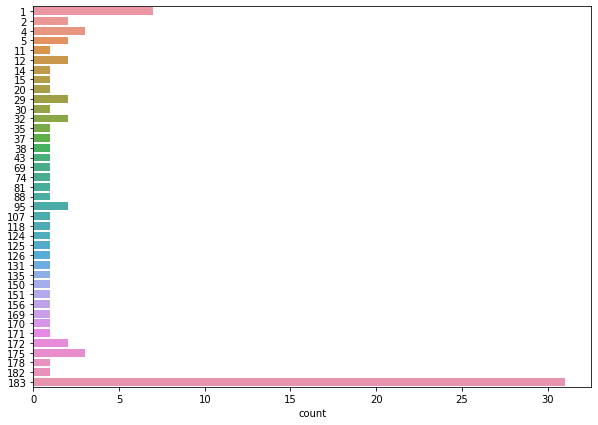

In [12]:
# Number of missing values in each column of col_meta_data
missing_val_count_by_column = (col_meta_data.isnull().sum())
missing_val_count_by_col = missing_val_count_by_column[missing_val_count_by_column > 0].sort_values(ascending=False)
print(f" {len(missing_val_count_by_col)} columns have missing value, and",
      f"Total {col_meta_data.isnull().sum().sum()} missing values in dataset")
plt.figure(figsize=(10, 7))
sns.countplot(data=missing_val_count_by_col, y= missing_val_count_by_col )

In [13]:
 #Explore each columns 
for col in col_meta_data.columns:
    print(f"{col}:   {len(col_meta_data[col].unique())} unique values:")

participant_id:   178 unique values:
sample_type:   3 unique values:
mRNAseq_cluster:   6 unique values:
bcr_patient_barcode:   178 unique values:
bcr_patient_uuid:   178 unique values:
vital_status:   2 unique values:
days_to_death:   90 unique values:
days_to_last_followup:   85 unique values:
additional_studies:   1 unique values:
adenocarcinoma_invasion:   2 unique values:
age_at_initial_pathologic_diagnosis:   45 unique values:
alcohol_history_documented:   3 unique values:
alcoholic_exposure_category:   6 unique values:
amount_of_alcohol_consumption_per_day:   7 unique values:
anatomic_neoplasm_subdivision:   4 unique values:
anatomic_neoplasm_subdivision_other:   11 unique values:
b_symptoms:   1 unique values:
bcr:   1 unique values:
bcr_aliquot_uuid:   178 unique values:
bcr_canonical_reason-2:   2 unique values:
bcr_canonical_reason-3:   2 unique values:
bcr_canonical_reason:   4 unique values:
bcr_followup_barcode:   151 unique values:
bcr_followup_uuid:   151 unique values:

In [14]:
# droping attributes which have onmy 1 unique value present as they are less informative for our analysis
for col in col_meta_data.columns:
    if len(col_meta_data[col].unique())<2:
        col_meta_data.drop(columns=col, inplace=True)

In [15]:
#Exploring attributes
col_meta_data.adenocarcinoma_invasion.value_counts()

yes    182
no       1
Name: adenocarcinoma_invasion, dtype: int64

No handles with labels found to put in legend.


RNA sequence cluster:3.0 types patient is 24.16% of total 
RNA sequence cluster:4.0 types patient is 22.47% of total 
RNA sequence cluster:1.0 types patient is 21.91% of total 
RNA sequence cluster:5.0 types patient is 16.85% of total 
RNA sequence cluster:2.0 types patient is 14.61% of total 


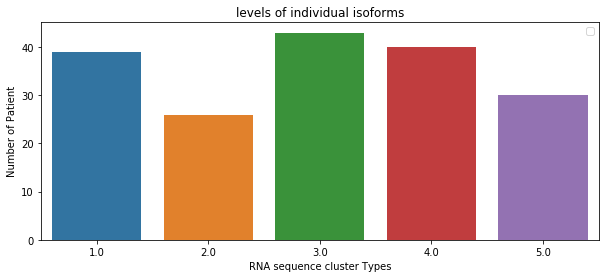

In [16]:
conts_mRNA = col_meta_data.mRNAseq_cluster.value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=conts_mRNA.index,y=conts_mRNA.values,)
plt.ylabel('Number of Patient')
plt.xlabel('RNA sequence cluster Types')
plt.title('levels of individual isoforms')
plt.legend()
for i, index in enumerate(conts_mRNA.index):
    val = conts_mRNA.values[i]
    val_pcn = round(((val)/sum(conts_mRNA.values))*100, 2)
    print(f"RNA sequence cluster:{index} types patient is {val_pcn}% of total ")

In [18]:
for cluster_type in mRNA_seq_group.mRNAseq_cluster.unique():
    data = mRNA_seq_group[mRNA_seq_group.mRNAseq_cluster==cluster_type]
    live_pcn = round((data[data['vital_status']=='alive']['counts']
                      /sum(data.counts.values))*100, 2)
    dead_pcn = round((data[data['vital_status']=='dead']['counts']/
                     sum(data.counts.values))*100, 2)
    print(f"mRNAseq_cluster type {cluster_type} patient dead {dead_pcn.values[0]}% times")
    print(f"mRNAseq_cluster type {cluster_type} patient alive {live_pcn.values[0]}% times")
    print("\n")

mRNAseq_cluster type 1.0 patient dead 64.1% times
mRNAseq_cluster type 1.0 patient alive 35.9% times


mRNAseq_cluster type 2.0 patient dead 23.08% times
mRNAseq_cluster type 2.0 patient alive 76.92% times


mRNAseq_cluster type 3.0 patient dead 65.12% times
mRNAseq_cluster type 3.0 patient alive 34.88% times


mRNAseq_cluster type 4.0 patient dead 57.5% times
mRNAseq_cluster type 4.0 patient alive 42.5% times


mRNAseq_cluster type 5.0 patient dead 36.67% times
mRNAseq_cluster type 5.0 patient alive 63.33% times




In [20]:
#65% of time patient are dead if mRNAseq_cluster type is 1 and 3. mRNAseq_cluster 1, 3, 4 are risky types then 2, 5

In [21]:
col_meta_data.sample_type.value_counts()

Primary solid Tumor    178
Solid Tissue Normal      4
Metastatic               1
Name: sample_type, dtype: int64

Text(0.5, 1.0, 'Vital status vs cancer type ')

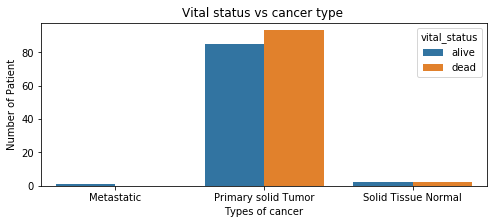

In [22]:
sample_type_group = col_meta_data.groupby(['sample_type', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(8, 3))
sns.barplot(x='sample_type', y='counts', hue='vital_status', data=sample_type_group)
plt.ylabel('Number of Patient')
plt.xlabel('Types of cancer')
plt.title('Vital status vs cancer type ')

In [23]:
col_meta_data.adenocarcinoma_invasion.value_counts()

yes    182
no       1
Name: adenocarcinoma_invasion, dtype: int64

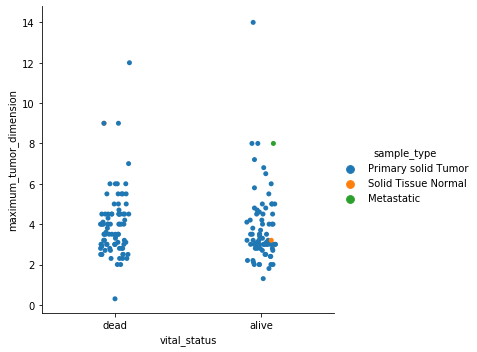

In [24]:
sns.catplot(x='vital_status', y='maximum_tumor_dimension', hue='sample_type', data=col_meta_data)

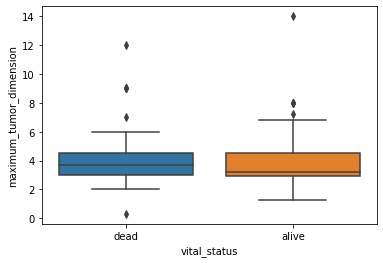

In [25]:
sns.boxplot(x='vital_status', y='maximum_tumor_dimension', data=col_meta_data)

In [26]:
col_meta_data.pathologic_stage.value_counts()

stage iib    122
stage iia     29
stage ib      15
stage iv       5
stage ia       5
stage iii      4
stage i        1
Name: pathologic_stage, dtype: int64

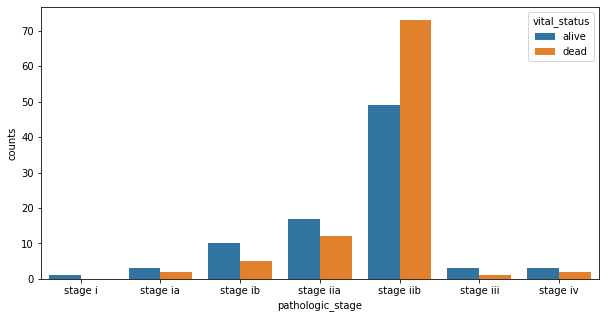

In [27]:
pathologic_stage_group = col_meta_data.groupby(['pathologic_stage', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.barplot(x='pathologic_stage', y='counts', hue='vital_status', data=pathologic_stage_group)

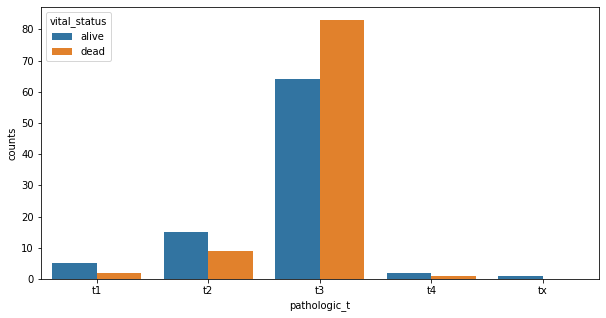

In [28]:
pathologic_t_group = col_meta_data.groupby(['pathologic_t', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.barplot(x='pathologic_t', y='counts', hue='vital_status', data=pathologic_t_group)

In [29]:
print(row_meta_data.index[:5])
print(row_meta_data.shape)
row_meta_data.head()

Index(['A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2ML1'], dtype='object', name='rid')
(18465, 0)


rhd
rid
A1BG
A1CF
A2BP1
A2LD1
A2ML1


In [30]:
my_data.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
A1BG,6.4,5.8,6.4,5.8,6.7,6.6,6.3,6.5,5.7,6.3,...,7.1,7.1,6.7,7.0,6.9,7.1,7.3,7.9,6.0,6.9
A1CF,4.7,5.7,3.0,5.1,4.4,4.2,1.6,6.8,6.0,NaN,...,5.4,6.4,6.5,4.4,3.3,3.6,6.2,1.2,4.9,2.0
A2BP1,-1.0,1.1,NaN,NaN,0.1,NaN,NaN,1.7,0.4,-1.5,...,3.5,1.3,-0.3,NaN,2.1,2.0,0.0,NaN,2.0,NaN
A2LD1,7.5,6.8,7.3,7.5,7.4,6.6,7.1,6.8,8.0,5.8,...,6.5,7.3,6.1,6.7,6.5,6.7,6.7,6.5,6.9,6.7
A2ML1,6.4,NaN,10.8,4.1,9.3,9.8,6.2,3.8,2.3,10.1,...,0.1,3.4,3.7,-0.9,3.6,1.0,2.8,10.5,3.1,5.1


Total 183 columns have missing value, and Total 134954 missing values in dataset


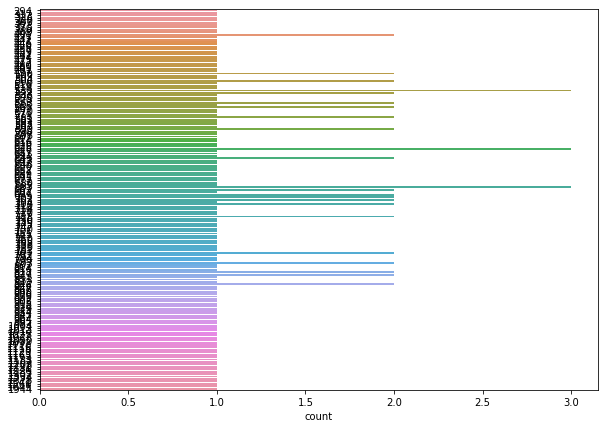

In [31]:
# Number of missing values in each column of my data
missing_val_count_by_column = (my_data.isnull().sum())
missing_val_count_by_col = missing_val_count_by_column[missing_val_count_by_column > 0].sort_values(ascending=False)
print(f"Total {len(missing_val_count_by_col)} columns have missing value, and",
      f"Total {my_data.isnull().sum().sum()} missing values in dataset")
plt.figure(figsize=(10, 7))
sns.countplot(data=missing_val_count_by_col, y= missing_val_count_by_col )

In [34]:
#filling missing values with mean values
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
imputed_my_data = pd.DataFrame(my_imputer.fit_transform(my_data))
imputed_my_data.columns = my_data.columns
imputed_my_data.index = my_data.index

imputed_my_data.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
A1BG,6.4,5.800000,6.400000,5.80000,6.7,6.600000,6.300000,6.5,5.7,6.30000,...,7.1,7.1,6.7,7.000000,6.9,7.1,7.3,7.900000,6.0,6.900000
A1CF,4.7,5.700000,3.000000,5.10000,4.4,4.200000,1.600000,6.8,6.0,7.43144,...,5.4,6.4,6.5,4.400000,3.3,3.6,6.2,1.200000,4.9,2.000000
A2BP1,-1.0,1.100000,7.577234,7.72895,0.1,7.664303,7.628817,1.7,0.4,-1.50000,...,3.5,1.3,-0.3,7.685749,2.1,2.0,0.0,7.541104,2.0,7.660231
A2LD1,7.5,6.800000,7.300000,7.50000,7.4,6.600000,7.100000,6.8,8.0,5.80000,...,6.5,7.3,6.1,6.700000,6.5,6.7,6.7,6.500000,6.9,6.700000
A2ML1,6.4,7.640088,10.800000,4.10000,9.3,9.800000,6.200000,3.8,2.3,10.10000,...,0.1,3.4,3.7,-0.900000,3.6,1.0,2.8,10.500000,3.1,5.100000


In [35]:
print(len(my_data.columns.unique()))
print(len(col_meta_data.index.unique()))
# Lets combine col_meta_data and my_data

183
183


In [36]:
col_to_merge = ['sample_type', 'mRNAseq_cluster','adenocarcinoma_invasion', 'vital_status', 'maximum_tumor_dimension', 'pathologic_stage', 'pathologic_m', 'pathologic_n', 'pathologic_t']
participant_id = col_meta_data.participant_id
target_variable = col_meta_data.sample_type
col_meta_data = col_meta_data.set_index('participant_id')
imputed_my_data = imputed_my_data.rename(columns=participant_id).T
#imputed_my_data = imputed_my_data.join(col_meta_data[col_to_merge])
imputed_my_data.head()

rid,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
cid,,,,,,,,,,,,,,,,,,,,,
aab1,6.4,4.7,-1.000000,7.5,6.400000,14.3,10.6,8.8,1.000000,9.4,...,8.6,6.2,9.0,9.9,7.600381,9.2,12.9,10.1,9.3,5.5
aab4,5.8,5.7,1.100000,6.8,7.640088,14.0,10.2,5.6,-1.200000,9.1,...,8.8,5.8,8.5,10.0,7.640088,9.3,12.4,9.8,8.9,4.5
aab6,6.4,3.0,7.577234,7.3,10.800000,13.1,10.1,0.2,0.200000,9.7,...,9.1,3.9,8.1,10.0,-0.800000,9.4,13.5,9.8,9.2,4.7
aab8,5.8,5.1,7.728950,7.5,4.100000,13.8,8.6,3.2,-0.100000,9.6,...,8.9,5.2,8.5,9.7,1.900000,9.4,12.5,9.7,9.3,6.4
aab9,6.7,4.4,0.100000,7.4,9.300000,14.6,10.1,5.7,7.796183,9.8,...,8.4,5.9,8.6,9.9,0.100000,9.3,13.0,10.1,9.2,4.9


In [37]:
for col in col_to_merge:
    imputed_my_data[col] = col_meta_data[col]
imputed_my_data.head(2)

rid,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,psiTPTE22,sample_type,mRNAseq_cluster,adenocarcinoma_invasion,vital_status,maximum_tumor_dimension,pathologic_stage,pathologic_m,pathologic_n,pathologic_t
cid,,,,,,,,,,,,,,,,,,,,,
aab1,6.4,4.7,-1.0,7.5,6.400000,14.3,10.6,8.8,1.0,9.4,...,5.5,Primary solid Tumor,1.0,yes,dead,4.5,stage iib,m0,n1,t3
aab4,5.8,5.7,1.1,6.8,7.640088,14.0,10.2,5.6,-1.2,9.1,...,4.5,Primary solid Tumor,2.0,yes,alive,6.8,stage iib,m0,n1,t2


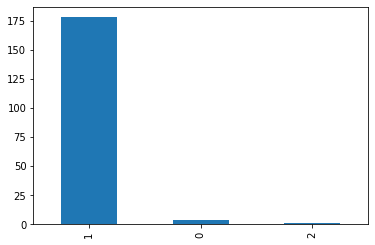

In [38]:
def cat_to_numeric(x):
    if x=='Solid Tissue Normal':
        return 0
    elif x=='Primary solid Tumor':
        return 1
    else:
        return 2
target_variable = target_variable.map(lambda x: cat_to_numeric(x))
target_variable.value_counts().plot(kind='bar')

In [39]:
imputed_my_data.isnull().sum().sum()

23

In [40]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(imputed_my_data.drop(columns=col_to_merge))

from sklearn.decomposition import PCA as sklearnPCA
n_components = 100
sklearn_pca = sklearnPCA(n_components=n_components)
Y_sklearn = sklearn_pca.fit_transform(X_std)

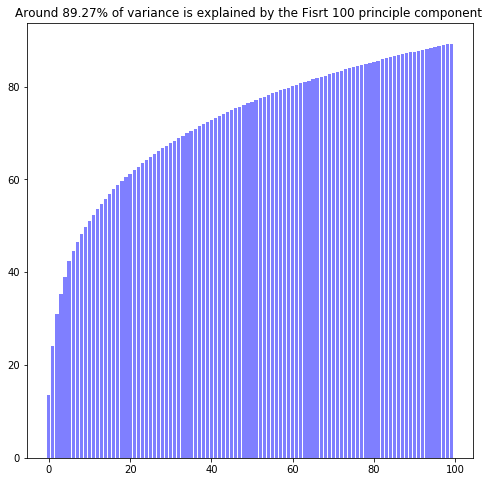

In [41]:
cum_sum = sklearn_pca.explained_variance_ratio_.cumsum()

explained_var = round(sklearn_pca.explained_variance_ratio_.sum()*100, 2)

cum_sum = cum_sum*100

fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(n_components), cum_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
plt.title(f"Around {explained_var}% of variance is explained by the Fisrt {n_components} principle component ");

[]

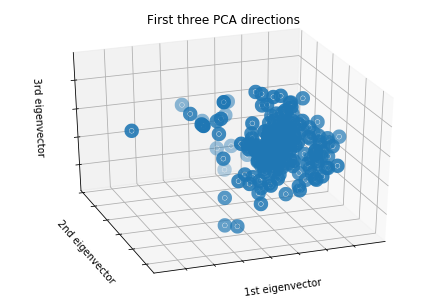

In [42]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
X_reduced  = sklearn_pca.fit_transform(X_std)
Y=target_variable
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

Text(0.5, 1.0, 'This The 2D Transformation of above graph ')

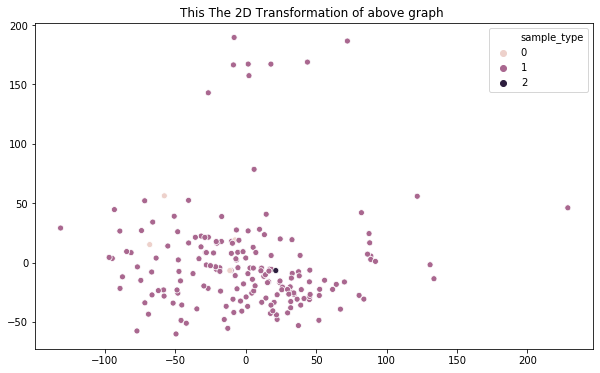

In [43]:
fig = plt.figure(1, figsize=(10,6))
sns.scatterplot(X_reduced[:, 0],  X_reduced[:, 1],hue=Y)
plt.title("2D Transformation of above graph ")

## Solution 2


In [44]:
imputed_my_data = imputed_my_data[imputed_my_data['adenocarcinoma_invasion']=='yes']
imputed_my_data.shape

(182, 18474)

In [61]:
ifn_sig = pd.read_csv('/Users/mahaksharma/Desktop/Finalised Assignment_01.01.2020/Copy of type1_IFN.txt', header=None)
ifn_sig.columns = ['member']
ifn_sig.head()

,member
0,IFIT1
1,IFI44
2,IFIT3
3,MX2
4,OAS1


In [62]:
ifn_sig_data = imputed_my_data[ifn_sig['member'].to_list()]
ifn_sig_data.shape

(182, 25)

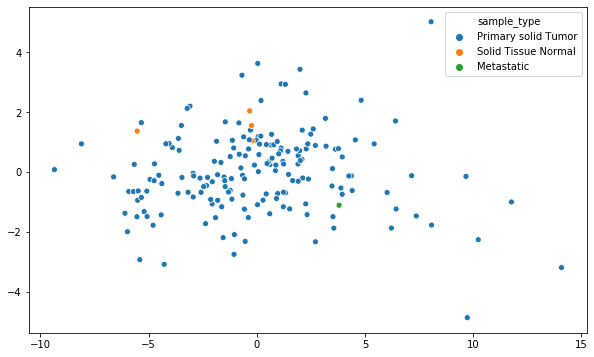

In [63]:
X_std = StandardScaler().fit_transform(ifn_sig_data)
n_components = 2
sklearn_pca = sklearnPCA(n_components=n_components)
X_reduced  = sklearn_pca.fit_transform(X_std)
fig = plt.figure(1, figsize=(10,6))
sns.scatterplot(X_reduced[:, 0],  X_reduced[:, 1],hue=imputed_my_data['sample_type'])

## GSVA score calculation

In [64]:
!pip install gsva
from GSVA import gsva
from plotnine import *
from sklearn.manifold import TSNE

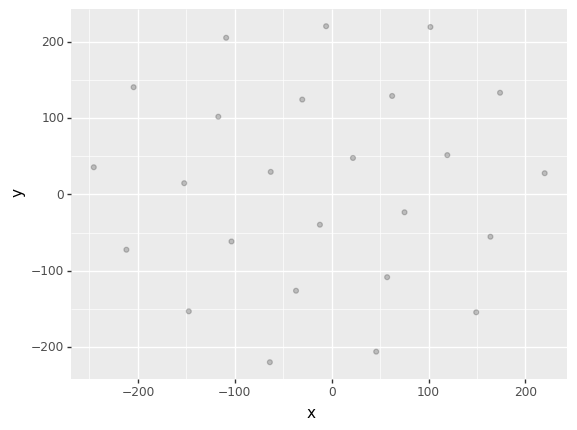

<ggplot: (-9223372029832581453)>

In [65]:
XV = TSNE(n_components=2).\
    fit_transform(ifn_sig_data.T)
df = pd.DataFrame(XV).rename(columns={0:'x',1:'y'})
(ggplot(df,aes(x='x',y='y'))
 + geom_point(alpha=0.2)
)

In [66]:
expression_df = pd.read_csv('/Users/mahaksharma/Desktop/Finalised Assignment_01.01.2020/Copy of Pancreas_log_tpm_RNAseq_mat.csv',index_col=0)
expression_df.iloc[0:5,0:5]

,GTEX.111CU.0526.SM.5EGHK,GTEX.111YS.1226.SM.5EGGJ,GTEX.1122O.0726.SM.5GIEV,GTEX.1128S.0826.SM.5GZZI,GTEX.117YX.0226.SM.5EGH6
PRSS1,16.297794,17.273222,16.897715,16.186521,16.867870
REG1A,16.726019,14.916299,15.154462,17.044746,16.195776
CPA1,15.109871,15.999450,15.643603,15.211090,15.570182
CLPS,16.179929,16.494527,16.526056,13.952286,15.956081
CELA3A,14.873204,15.198867,15.200017,14.133383,13.966776


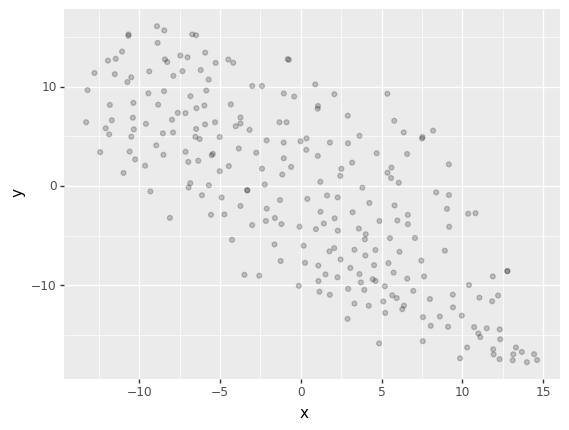

<ggplot: (-9223372029835747205)>

In [67]:
XV = TSNE(n_components=2).\
    fit_transform(expression_df.T)
df = pd.DataFrame(XV).rename(columns={0:'x',1:'y'})
(ggplot(df,aes(x='x',y='y'))
 + geom_point(alpha=0.2)
)

The default command runs without verbose message output. Observed that genes that are not part of the expression_df are dropped from the analysis, and depending on our choice of GSVA method, genes for which there is not enough expression (i.e. all zero expression) will be dropped.

In [69]:
pathways_df = gsva(expression_df,ifn_sig)
#pathways_df.iloc[0:5,0:5]

KeyError: 'name'

Not able to club both the expression and gene data file as the IFN text file has missing data according to gsva function .For the gsva arguments the file data needs to be in this format
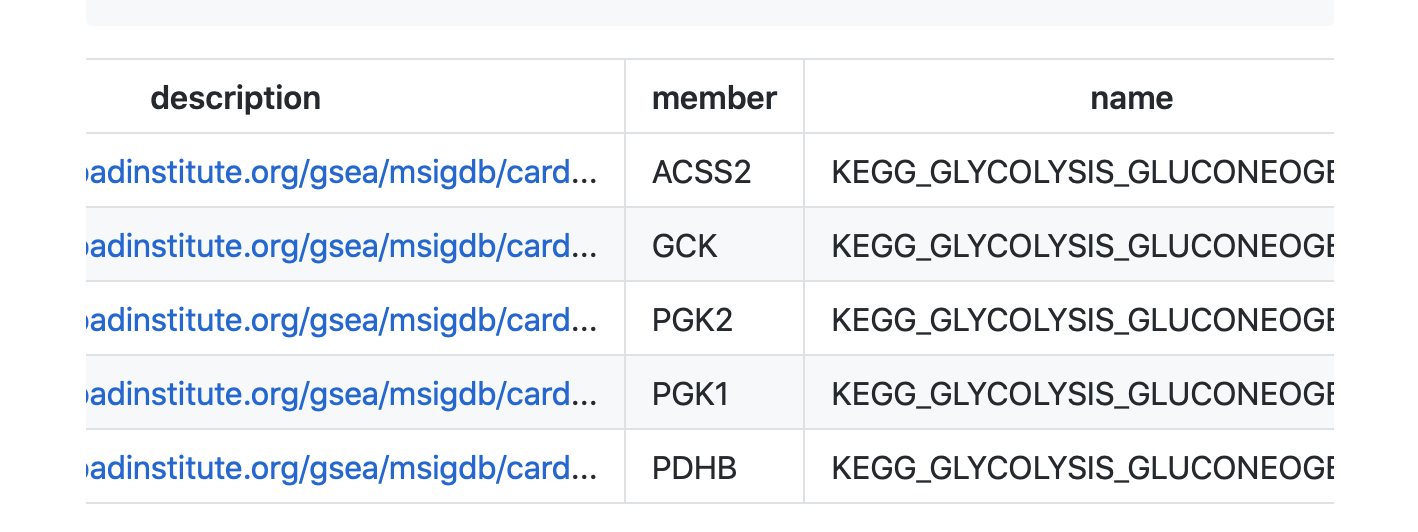
